<a href="https://colab.research.google.com/github/MazidF/Bale_Project/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os

import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Resize image files. (100 x 100)

In [2]:
from PIL import Image

def resize_images(images):
  for image in images:
    im = Image.open(image)
    im = im.resize((100, 100))
    try:
      im.save(image)
    except Exception as e:
      im = im.convert('RGB')
      im.save(image)

Get all images path in a folder.

In [3]:
def load_images_path_from_folder(folder):
    paths = []
    for filename in os.listdir(folder):
      path = os.path.join(folder,filename)
      img = cv2.imread(path)
      if img is not None:
        paths.append(path)
    return paths


Load all images data in a folder.

In [4]:
def laod_images_data_by_paths(paths):
    images = []
    for path in paths:
        img = cv2.imread(path)
        if img is not None:
            images.append(img)
    return images

Check if images need to be resized to (100 x 100).

In [5]:
def need_resizing():
    with open('/content/drive/MyDrive/ML Project/info.txt', 'r') as file:
        return file.readline() == 'FALSE'

Update resize state of images.

In [6]:
def change_resizing_state(state: bool):
    with open('/content/drive/MyDrive/ML Project/info.txt', 'w') as file:
        if state:
            text = 'TRUE'
        else:
            text = 'FALSE'
        file.write(text)

Load and resize all images.

In [7]:
def load_and_resize_images_from_folders(folders):
    resize = need_resizing()
    images = []
    for folder in folders:
        images_path = load_images_path_from_folder(folder)
        if resize:
            resize_images(images_path)
        images.append(laod_images_data_by_paths(images_path))
    change_resizing_state(True)
    return images

In [8]:
root_path = '/content/drive/MyDrive/ML Project/images'
names = [
    '206',
    'samand',
    'peraid',
    'tiba'
]
folders = [root_path + '/' + name for name in names]
images = load_and_resize_images_from_folders(folders)
for index, name in enumerate(names):
    print(f'{name} count: {len(images[index])}')

206 count: 593
samand count: 459
peraid count: 503
tiba count: 491


Create a data set with label.

In [9]:
# use numeric labels. for example samand's label --> [0, 1, ... , 0] (becuase second name is samand)
labels = [[1 if name == label else 0 for name in names] for label in names]
print(f'labels: {labels}')

image_data = []
for i in range(len(names)):
    label = labels[i]
    for image in images[i]:
        image_data.append([image] + label) # put each image with it's label in iamge_data

labels: [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


In [10]:
np.random.shuffle(image_data)
data_size = len(image_data)

train_data_size = int(data_size * 0.7)
train = image_data[:train_data_size]

validation_data_size = int(data_size * 0.15)
validation = image_data[train_data_size:train_data_size + validation_data_size]

test = image_data[train_data_size + validation_data_size:]

print(len(train), len(validation), len(test), sep = ", ")

1432, 306, 308


In [11]:
x_train, y_train = [train[i][0] for i in range(len(train))], [train[i][1:] for i in range(len(train))]
x_validation, y_validation = [validation[i][0] for i in range(len(validation))], [validation[i][1:] for i in range(len(validation))]
x_test, y_test = [test[i][0] for i in range(len(test))], [test[i][1:] for i in range(len(test))]

GrayScaler.

In [12]:
def grayscaler(image):
  img = Image.open(image)
  return img.convert('L')

Apply scales to image_data.

In [13]:
scaled_image_data = image_data.copy()

# gray scaler
scaled_image_data = list(map(lambda img: img.convert('L'), scaled_image_data))

scaled_image_data

AttributeError: ignored

Install and import mlflow.

In [14]:
!pip install mlflow

import mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.

Define mlflow functions.

In [15]:
def log_param(key, value):
    mlflow.load_param(key, value)


def log_metric(key, value):
    mlflow.log_metric(key, value)


def log_plot(plot_file):
    mlflow.log_artifact(plot_file)


def log_model(model):
    mlflow.tensorflow.log_model(model, 'model')


Modeling.

Consist of 2 parts:

*   Combination of some Convolutional and Pooling layers
*   Some Fully-Connected layers

> ***Layers***

Convolution Layer:
*   is the main building block of a CNN
*   it contains a set of filters, parameters of which are to be learned throughout the training
*   the size of the filters is usually smaller than the actual image

Max Pooling Layer:
*    is a pooling operation that calculates the maximum value for patches of a feature map
*    it used to create a downsampled feature map

Dropout Layer:
*   randomly exclude X% of the neurons in the layer to avoid overfitting

Flatten Layer:
*   converts the 2D matrix data into a vector
*   it allows the output to be fully processed by a fully connected layer

Dense Layer:
*   feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer

> ***Activation Functions***

RELU Activation Function:
*    is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

Softmax Activation Function:
*   output probability-like predictions for each class

In [16]:
with mlflow.start_run():  

    model = Sequential()
    input_shape = (100, 100, 3)

    relu = tf.nn.relu
    softmax = tf.nn.softmax

    model.add(Conv2D(32, kernel_size = (3, 3), input_shape = input_shape, activation = relu))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32 * 2, kernel_size = (3, 3), input_shape = input_shape, activation = relu))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32 * 2 * 2, kernel_size = (3, 3), input_shape = input_shape, activation = relu))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation = relu))
    model.add(Dropout(0.2))
    model.add(Dense(len(names), activation = softmax))

    # log to mlflow
    log_model(model)

    # summary
    model.summary()

    # compile CNN
    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

    fit_result = model.fit(np.array(x_train), np.array(y_train), validation_data= (np.array(x_validation), np.array(y_validation)), epochs=17)

2023/01/24 18:16:56 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/01/24 18:17:05 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpl47lna17/model, flavor: tensorflow), fall back to return ['tensorflow==2.9.2']. Set logging level to DEBUG to see the full traceback.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

Showing plot.

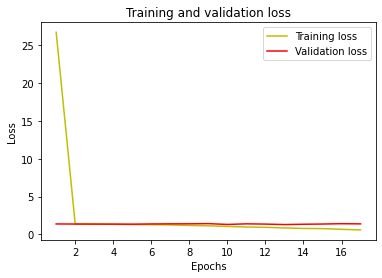

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = fit_result.history['loss']
val_loss = fit_result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(np.array(x_test), np.array(y_test), verbose=2)
print(test_loss, test_acc)

10/10 - 3s - loss: 1.5198 - accuracy: 0.5000 - 3s/epoch - 322ms/step
1.5197762250900269 0.5
